In [19]:
import torch
import  torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [13]:
# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.1307,), (0.3081,))
# ])

In [20]:
train_dataset = datasets.MNIST(root='./data',
                              train = True,
                              transform = transforms.ToTensor(),
                              download = True)

test_dataset = datasets.MNIST(root='./data',
                               train = False,
                               transform = transforms.ToTensor())

In [21]:
train_loader = DataLoader(dataset = train_dataset,
                          batch_size = 64,
                          shuffle = True)

test_loader = DataLoader(dataset = test_dataset,
                          batch_size = 64,
                          shuffle = True)

In [22]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(784, 500)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(500, 10)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet()
# loss and opimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

num_epochs = 3
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for index, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (index+1)% 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}]')

Epoch [1/3]
Epoch [1/3]
Epoch [1/3]
Epoch [1/3]
Epoch [1/3]
Epoch [1/3]
Epoch [1/3]
Epoch [1/3]
Epoch [1/3]
Epoch [2/3]
Epoch [2/3]
Epoch [2/3]
Epoch [2/3]
Epoch [2/3]
Epoch [2/3]
Epoch [2/3]
Epoch [2/3]
Epoch [2/3]
Epoch [3/3]
Epoch [3/3]
Epoch [3/3]
Epoch [3/3]
Epoch [3/3]
Epoch [3/3]
Epoch [3/3]
Epoch [3/3]
Epoch [3/3]


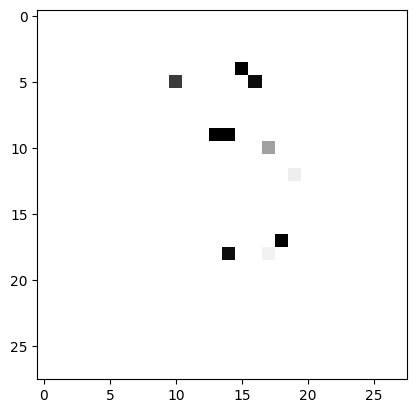

In [49]:
import cv2
image_path = "/content/data/MNIST/Untitled.png"


image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = image.astype('float32')
image = cv2.resize(image,(28,28))
plt.imshow(image, cmap = "gray")
image = torch.tensor(image)
image = image.unsqueeze(0)
image = image.reshape(-1, 28*28)  # Flatten the image
model.eval()
with torch.no_grad():
    outputs = model(image)
    sth, predicted = torch.max(outputs.data, 1)

In [47]:
import matplotlib.pyplot as plt

In [48]:
predicted

tensor([3])

In [50]:
sth

tensor([1554.9183])